<a href="https://colab.research.google.com/github/Maucho6340/1764-estadistica-con-python-probabilidad-y-muestreo/blob/main/Regresi%C3%B3n_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresi√≥n Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripci√≥n:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los √∫ltimos tiempos. La crisis financiera que afecta a la econom√≠a ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor inter√©s en los estudios de previsi√≥n de la demanda basados ‚Äã‚Äãen las caracter√≠sticas de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuaci√≥n inmobiliaria utilizando la metodolog√≠a de regresi√≥n lineal, que es una de las t√©cnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>√Årea</b> - √Årea del inmueble en m¬≤</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en l√≠nea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia m√°s cercana (km) (en l√≠nea recta)</li>
</ul>

## Lectura de los datos

In [2]:
datos=pd.read_csv('dataset.csv',sep=';')

## Ver los datos

In [3]:
datos

Valor  Area     Dist_Playa  Dist_Farmacia
0     850277   280    0.240925428       0.793637
1     166359   208    0.904135764       0.134494
2     471349   170     0.05952528       0.423318
3     101664   100    288.318.073       0.525064
4     406654   164    0.239757554       0.192374
...      ...   ...            ...            ...
4995  135860    70    0.479357396       0.752891
4996  166359   128  8.594.487.125       0.370170
4997  147874    70    0.253138238       0.421407
4998   35120    55  8.945.226.049       0.680963
4999  101664    94    0.774443881       0.027916

[5000 rows x 4 columns]

## Verificando el tama√±o del dataset

In [4]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estad√≠sticos descriptivos


In [5]:
datos.describe().round(2)

Valor     Area  Dist_Farmacia
count     5000.00  5000.00        5000.00
mean    259320.95   121.94           0.50
std     348108.85    90.54           0.29
min      13863.00    16.00           0.00
25%      85028.00    70.00           0.24
50%     151571.00    93.00           0.50
75%     293900.00   146.00           0.75
max    4621072.00  2000.00           1.00

## Matriz de correlaci√≥n

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlaci√≥n </b> es una medida de asociaci√≥n lineal entre dos variables y su valor est√° entre <b> -1 </b> y <b> +1 </b>, d√≥nde <b> - 1 </b> indica asociaci√≥n negativa perfecta y <b> +1 </b> indica asociaci√≥n positiva perfecta.</p>

In [6]:
# Limpiar datos
datos.dtypes  # Revisa qu√© columnas est√°n como 'object' (texto)

Valor              int64
Area               int64
Dist_Playa        object
Dist_Farmacia    float64
dtype: object

In [7]:
# Aseg√∫rate de aplicar esta limpieza y conversi√≥n a 'Dist_Playa'
# si a√∫n no lo has hecho o si tus datos se cargan de nuevo con ese formato.

# Paso 1: Reemplazar los puntos de miles por una cadena vac√≠a
# Esto convierte '288.318.073' en '288318073' antes de la conversi√≥n
datos['Dist_Playa'] = datos['Dist_Playa'].astype(str).str.replace('.', '', regex=False)

# Paso 2: Convertir la columna a float
# Ahora s√≠ se puede convertir a float correctamente
datos['Dist_Playa'] = datos['Dist_Playa'].astype(float)

# Si tambi√©n tienes que hacer algo similar para 'Valor' o 'Area' y esperas floats:
# datos['Valor'] = datos['Valor'].astype(str).str.replace('.', '', regex=False).astype(float)
# datos['Area'] = datos['Area'].astype(str).str.replace('.', '', regex=False).astype(float)

datos.dtypes

Valor              int64
Area               int64
Dist_Playa       float64
Dist_Farmacia    float64
dtype: object

In [8]:
datos['Dist_Playa'] = datos['Dist_Playa'].astype(float)

In [9]:
datos.corr().round(4)

Valor    Area  Dist_Playa  Dist_Farmacia
Valor          1.0000  0.7110     -0.3354        -0.0244
Area           0.7110  1.0000     -0.2515        -0.0310
Dist_Playa    -0.3354 -0.2515      1.0000         0.0199
Dist_Farmacia -0.0244 -0.0310      0.0199         1.0000

Necesitamos que la tres variables candidatas a explicativas, no tengan correlaci√≥n fuerte entre s√≠, eso es muy malo a la hora de sumar al modelo.<br>

√Årea tiene una correlaci√≥n moderada con distnacia a la playa, y muy baja con relaci√≥n a distancia a la farmacia.<br>

Distancia a la playa, tiene una correlaci√≥n muy baja con la distancia a la farmacia.<br>

Entonces podemos concluir que las tres candidatas a variables explicativas, no tienen correlaci√≥n fuerte entre si, y por eso podemos utilizarlas en nuestro modelo de aproximaci√≥n al principio.


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualizaci√≥n de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gr√°ficos estad√≠sticos.</p>

In [10]:
import seaborn as sns

## Configuraci√≥n del formato de los gr√°ficos

In [11]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks


In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

ax es la variable que se asignar√° al objeto gr√°fico

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

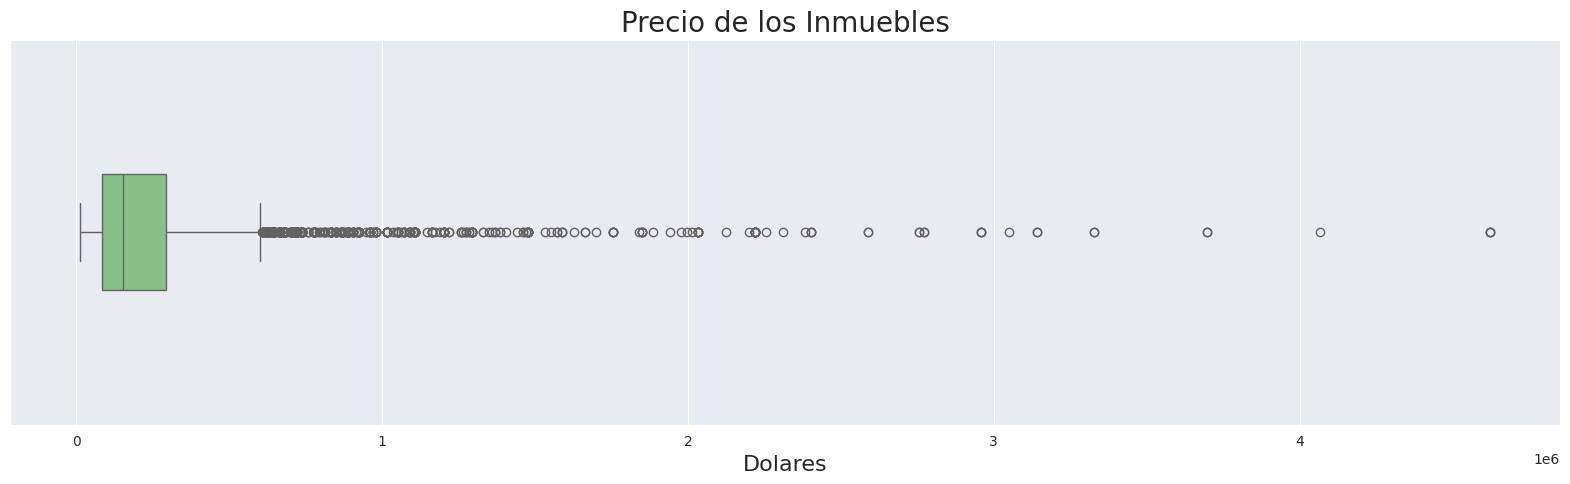

In [13]:
ax=sns.boxplot(data=datos['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

Este tipo de variable, tienen t√≠picamente este comportamiento de muchos punto por encima del l√≠mite superior y es debido a este peculiar comportamiento que debemos tener cuidado en clasificar todos estos puntos como outliners, pues s√≥lo los tres √∫ltimos puntos son realmente outliers.<br>

Con esta pila de puntos por sobre el l√≠mite superior, podr√≠a indicar una simetr√≠a hacia la derecha de la variable precio de los inmuebles. Para entender mejor, es necesario revisar el histograma de la variable.

# <font color='red' style='font-size: 30px;'>2.2 Distribuci√≥n de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribuci√≥n de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

El c√≥digo original del instructor es:<br>

**<font color=darkgreen> ax=sns.displot(datos['Valor'])<br>
ax.figure.set_size_inches(20, 5)<br>
ax.set_title('Precio de los Inmuebles', fontsize=20)<br>
ax.set_xlabel('Dolares', fontsize=16)<br>
ax<br>**

Pero no grafica bien pues contiene error y no entrega la l√≠nea de densidad (KDE)<br>

Por ello insert√© este c√≥digo sugerido por AI COPILOT


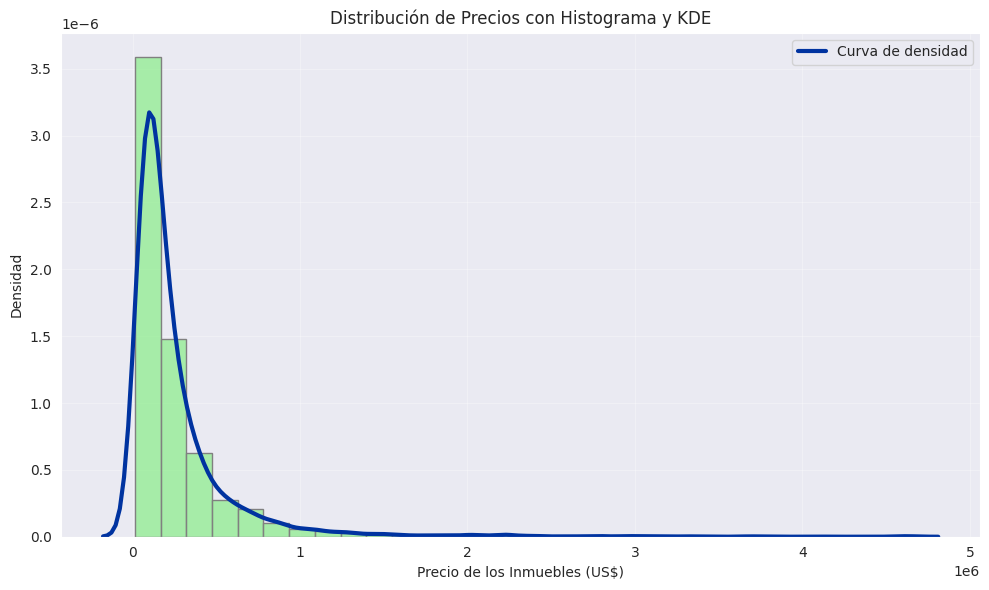

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Histograma con densidad en lugar de conteo
sns.histplot(datos['Valor'],
             stat='density',
             kde=False,
             color='lightgreen',
             edgecolor='gray',
             bins=30)

# Curva KDE separada en azul intenso
sns.kdeplot(datos['Valor'],
            color='#0033A0',  # Azul profundo
            linewidth=3,
            label='Curva de densidad')

# Detalles visuales
plt.title('Distribuci√≥n de Precios con Histograma y KDE')
plt.xlabel('Precio de los Inmuebles (US$)')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Analizando este histograma, podemos ver una concentraci√≥n para valores mas bajos, o sea, una simetr√≠a a la derecha. Esto tiene sentido para este tipo de variable donde hay muchos inmuebles con precios bajos y pocos con precios altos (de lujo). Esto es muy com√∫n cuando manejamos datos reales. El tema es que esto puede generar problemas al generar el modelo de regresi√≥n, pues una de las los supuestos te√≥ricos del modelo de regresi√≥n es que la variable depediente tenga una forma sim√©trica. <br>

Esta simetr√≠a dificilmente ocurrir√° con datos relaes, pero debemos intentar que la variable se acerque los mas posible a esa forma.<br>

Del histograma deducimos que la forma se parece mas a la figura de asimetr√≠a a la derecha.<br>

Si bien esta variable con gran asimetr√≠a puede generar problemas, podemos hacer transformaciones de los datos para que sea menos asim√©trica y se acerque mas a la figura del medio.


<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersi√≥n entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gr√°ficos de dispersi√≥n entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relaci√≥n entre pares de variables en un dataset.</p>

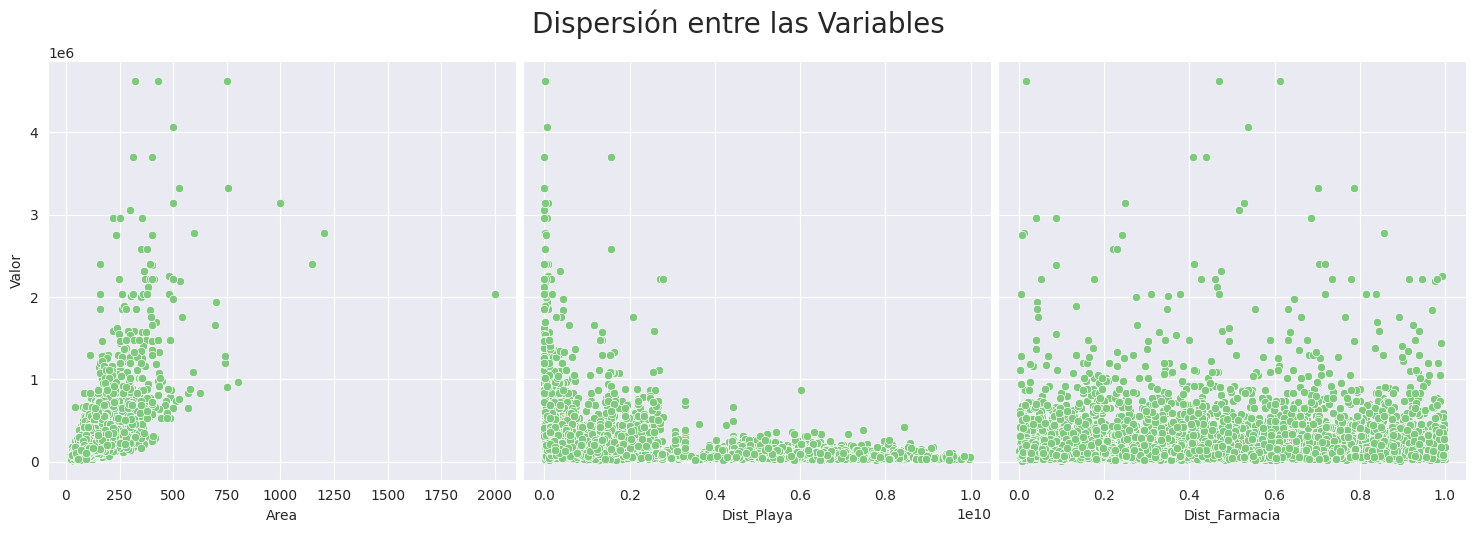

In [15]:
ax=sns.pairplot(datos, y_vars='Valor',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0)
ax.fig.suptitle('Dispersi√≥n entre las Variables', fontsize=20, y=1.05)
ax

Podemos ver que en el primer y segundo gr√°fico una cierta tendencia no l√≠neal, es decir, a una curva. No as√≠ entre valor y distancia a la farmacia, donde no podemos identificar ninguna tendencia, cuyos puntos no muestran ninguna direcci√≥n.

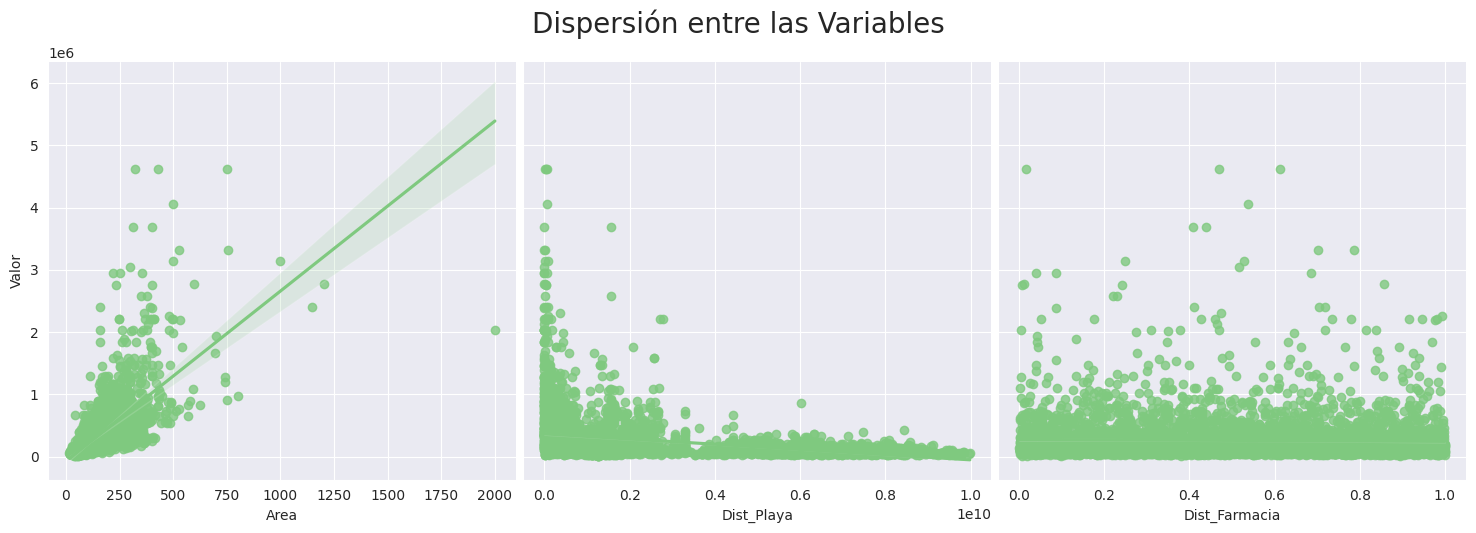

In [16]:
ax=sns.pairplot(datos, y_vars='Valor',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0, kind='reg')
ax.fig.suptitle('Dispersi√≥n entre las Variables', fontsize=20, y=1.05)
ax

Aqu√≠ podemos ver que los puntos no siguen la l√≠nea de regresi√≥n. Los puntos est√°n muy dispersos en los tres gr√°ficos, mayor en el tercero.<br>

Podemos concluir que la variable valor no est√° relacionada de forma lineal con las variables explicativas, por lo tanto no podemos estimar el modelo de regresi√≥n linear.<br>

Lo que vamos a hacer es aplicar una t√©cnica de transformaci√≥n, que ser√° la t√©cnica logar√≠tmica. Una vez transformadas, vamos a intentar identificar la relaci√≥n lineal entre las variable dependiente "valor" y las variables explicativas "Area", "Dist_playa" y "Dist_famacia".

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuici√≥n Normal
<hr>

### ¬øPorque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests param√©tricos asumen que los datos muestrales se recopilaron de una poblaci√≥n con una distribuci√≥n de probabilidad conocida. Muchos de los tests estad√≠sticos asumen que los datos siguen una distribuci√≥n normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [17]:
import numpy as np

## Aplicando la transformaci√≥n logar√≠tmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [18]:
np.log(0)

/tmp/ipython-input-18-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

Debemos tener en cuenta que Log(1)=0, pero Log(0)=indefinido, puesto que en DF tenemos valores 0 (valores m√≠nimos). Entonces no podemos aplicar logaritmo en forma directa a estos datos, pues no va a dar resultados indefinidos, puesto que el modelo de regresi√≥n no admite valores indefinidos.<br>

Entonces vamos a cambiar sus escalas.

Primero aplicamos Log a la variable "valor" que no tiene valores en cero pues el m√≠n de valor es $13.863.<br>

Lo mismo ocurre con la variable "Area"

In [19]:
datos['log_Valor']=np.log(datos['Valor']) # Podemos aplicar directamente log, porque esta variable no tiene valores en cero
datos['log_Area']=np.log(datos['Area']) # Podemos aplicar directamente log, porque esta variable no tiene valores en cero
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1) # Cambiamos la escala, agregando 1 al valor de la variable
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1) # Cambiamos la escala, agregando 1 al valor de la variable

In [20]:
datos.head()

Valor  Area   Dist_Playa  Dist_Farmacia  log_Valor  log_Area  \
0  850277   280  240925428.0       0.793637  13.653317  5.634790   
1  166359   208  904135764.0       0.134494  12.021903  5.337538   
2  471349   170    5952528.0       0.423318  13.063354  5.135798   
3  101664   100  288318073.0       0.525064  11.529429  4.605170   
4  406654   164  239757554.0       0.192374  12.915718  5.099866   

   log_Dist_Playa  log_Dist_Farmacia  
0       19.299998           0.584245  
1       20.622490           0.126187  
2       15.599327           0.352991  
3       19.479575           0.422036  
4       19.295139           0.175946

Ahora tenemos que ver si la transformaci√≥n a logaritmo logr√≥ reducir la simetr√≠a en la variable valor. Vamos a contruir el histograma para la variable valor.

## Distribuici√≥n de frecuencias de la variable *dependiente transformada* (y)

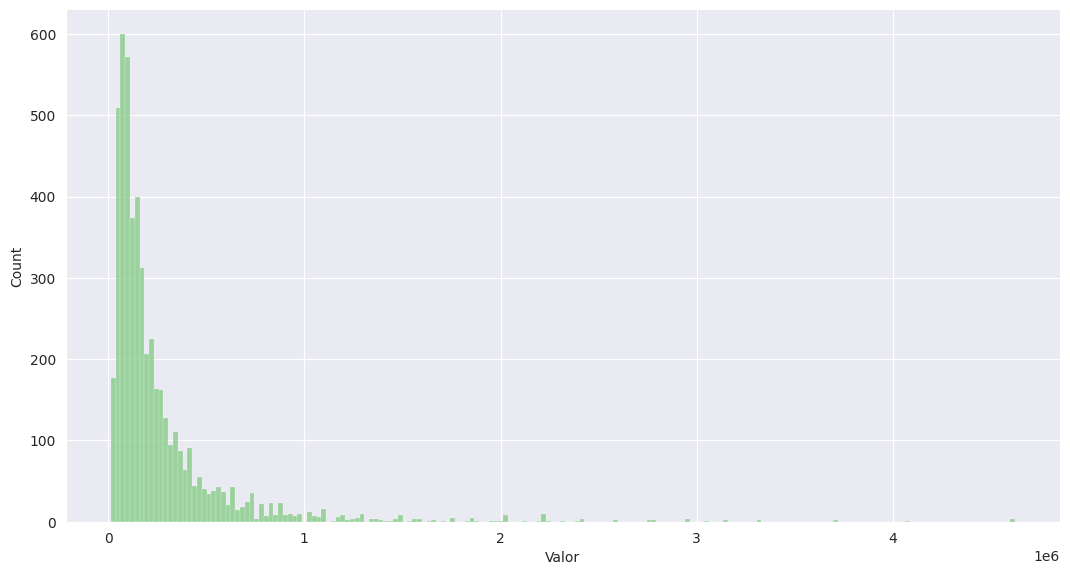

In [21]:
ax=sns.displot(datos['Valor'])
ax.figure.set_size_inches(12, 6)
#ax.set_title('Distribuici√≥n de Frecuencias', fontsize=20)
#ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

Lambda √≥ptimo para Box-Cox: -0.1752
Asimetr√≠a antes: 4.912312066155681
Asimetr√≠a despu√©s: 0.01565080181947175


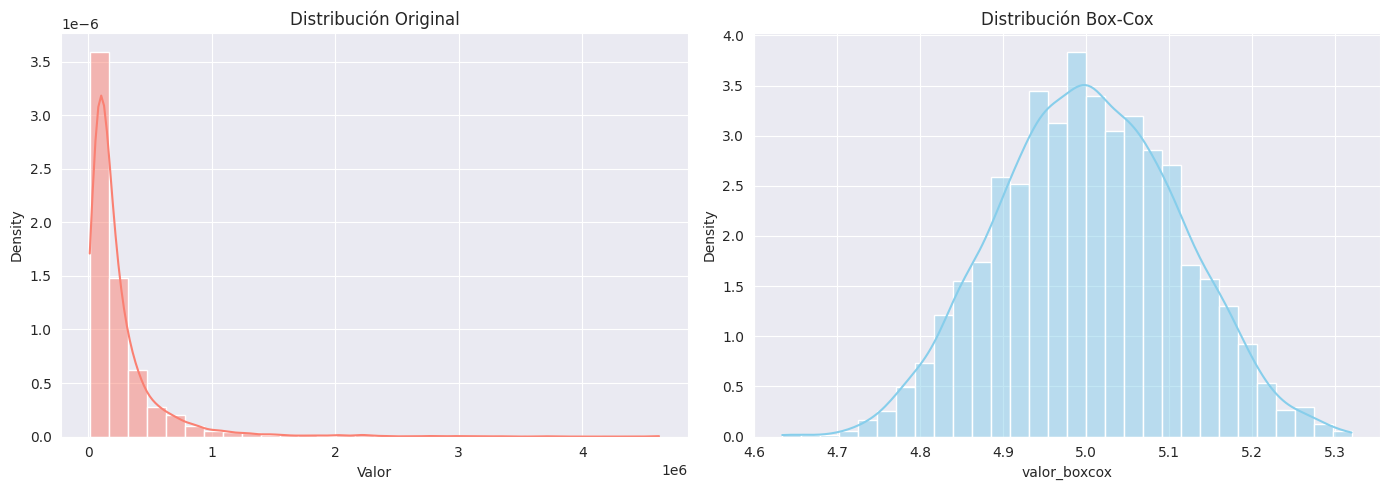

P-valor de normalidad (Box-Cox): 0.00001


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, normaltest, skew

# Aseg√∫rate de que los datos est√°n cargados
# datos = pd.read_csv('dataset.csv')  # si no lo has cargado a√∫n

# ‚úî Paso 1: verificar que la variable tiene solo valores positivos
if (datos['Valor'] <= 0).any():
    raise ValueError("Box-Cox requiere valores estrictamente positivos.")

# ‚úî Paso 2: aplicar transformaci√≥n Box-Cox
valor_boxcox, lambda_valor = boxcox(datos['Valor'])
datos['valor_boxcox'] = valor_boxcox  # nueva columna transformada

print(f"Lambda √≥ptimo para Box-Cox: {lambda_valor:.4f}")

# ‚úî Paso 3: analizar simetr√≠a
print("Asimetr√≠a antes:", skew(datos['Valor']))
print("Asimetr√≠a despu√©s:", skew(datos['valor_boxcox']))

# ‚úî Paso 4: visualizaci√≥n comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(datos['Valor'], bins=30, kde=True, stat='density', ax=axes[0], color='salmon')
axes[0].set_title('Distribuci√≥n Original')

sns.histplot(datos['valor_boxcox'], bins=30, kde=True, stat='density', ax=axes[1], color='skyblue')
axes[1].set_title('Distribuci√≥n Box-Cox')

plt.tight_layout()
plt.show()

# ‚úî Paso 5 (opcional): test de normalidad
stat, p_value = normaltest(datos['valor_boxcox'])
print(f"P-valor de normalidad (Box-Cox): {p_value:.5f}")

Lambda √≥ptimo para Box-Cox: -0.1752


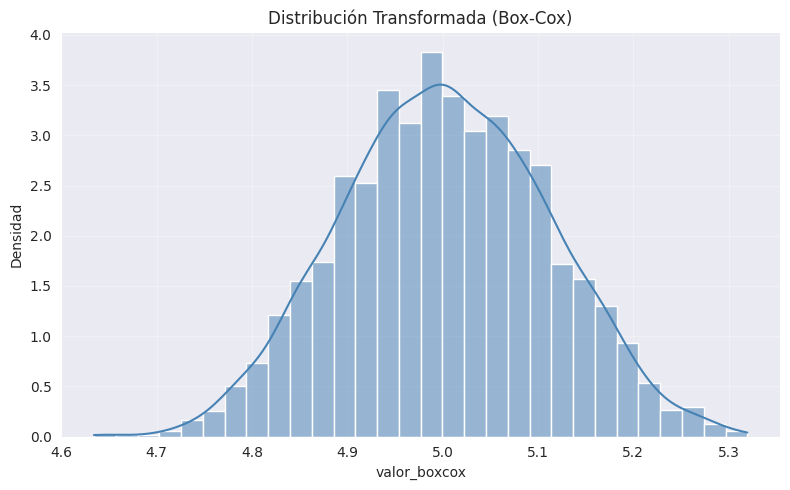

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Aplicar transformaci√≥n Box-Cox
valor_boxcox, lambda_valor = boxcox(datos['Valor'])
datos['valor_boxcox'] = valor_boxcox

# Mostrar lambda √≥ptimo
print(f"Lambda √≥ptimo para Box-Cox: {lambda_valor:.4f}")

# Graficar solo la variable transformada
plt.figure(figsize=(8, 5))
sns.histplot(datos['valor_boxcox'], bins=30, kde=True, stat='density', color='steelblue')
plt.title('Distribuci√≥n Transformada (Box-Cox)')
plt.xlabel('valor_boxcox')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relaci√≥n lineal</font>
<hr style='border: 2px solid red;'>

## Gr√°ficos de dispersi√≥n entre las variables transformadas del dataset

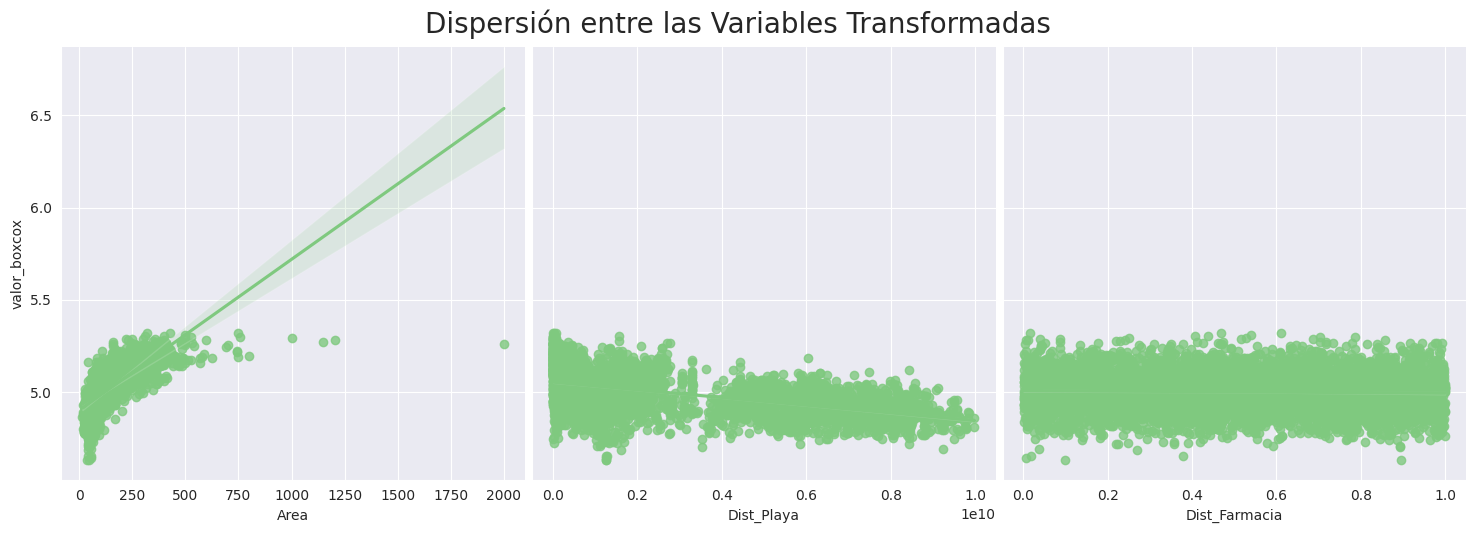

In [24]:
ax=sns.pairplot(datos, y_vars='valor_boxcox',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0, kind='reg')
ax.fig.suptitle('Dispersi√≥n entre las Variables Transformadas', fontsize=20, y=1.05)
ax

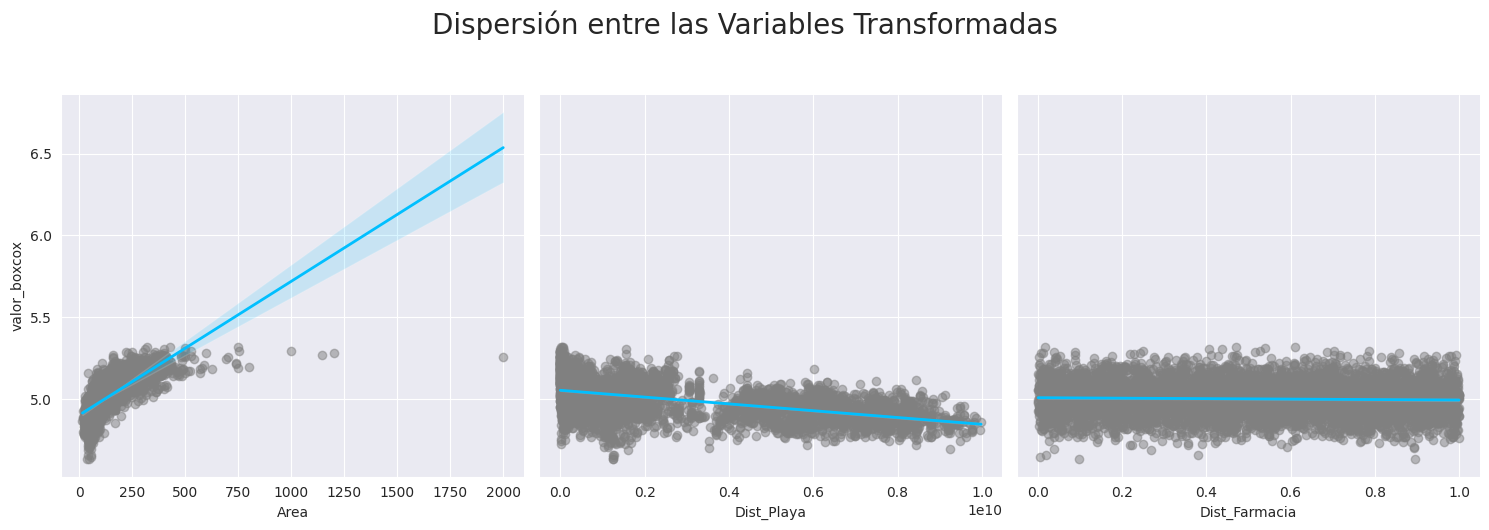

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color azul luminoso personalizado (puedes cambiar el c√≥digo hex si lo deseas)
azul_luminoso = '#00BFFF'  # Deep Sky Blue

# Pairplot con l√≠nea de regresi√≥n azul
ax = sns.pairplot(datos,
                  y_vars='valor_boxcox',
                  x_vars=['Area', 'Dist_Playa', 'Dist_Farmacia'],
                  kind='reg',
                  height=5.0,
                  plot_kws={'line_kws': {'color': azul_luminoso, 'linewidth': 2},
                            'scatter_kws': {'alpha': 0.5, 'color': 'gray'}})

# T√≠tulo general del gr√°fico
ax.fig.suptitle('Dispersi√≥n entre las Variables Transformadas', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

Ahora que tenemos relaciones mas lineales, podemos estimar modelos de regresi√≥n.<br>

En el primer gr√°fico tenemos una relaci√≥n positiva entre el valor del inmueble y el √°rea de superficie. Una relaci√≥n negativa entre el valor y la distancia a la playa. Y ning√∫na relaci√≥n entre el valor y la distancia a la farmacia.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

Antes de armar el modelo de regresi√≥n, debemos utilizar un procedimiento ampliamente utilizado, consiste en dividir los datos en dos partes, una para entrenar el modelo y otra para entrrenarlo y ver las predicciones. Usamos la funci√≥n **<font color ="blue">train_test_split"**

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [27]:
# Parametros de entrada: un DF para ingresar la variable dependiente, en este caso la llamaremos "y"
y=datos['valor_boxcox']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [28]:
# El segundo par√°metro de entrada: el DF que almacenar√° las variabels explicativas "x"
x=datos[['Area',	'Dist_Playa',	'Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [29]:
# "x_train" e "y_train" son las "x" del conjunto entrenamiento, almacenar√°n los valores de las variables explicativas del conjunto de entrenamiento.
# "x_test" e "y_test" son las "y" del conjunto de prueba, almacenar√°n los valores de las variables explicativas del conjunto de prueba.
# "(x,y" es el DF que contiene la variable dependiente, x es el DF que contiene las variables explicativas
# "test_size=0.2" es el % de datos que la funci√≥n elegir√° al azar desde el data set, para conformar los datos del conjunto de pruebas (como
#    tenemos 5.000 registros, podemos usar este valor bajo de 20%, el 80% restante se asignar√° al conjunto de entrenamiento.
# "random_state=123" es una semilla (2811) que generar√° n¬∞ aleatorios, para que podamos generar los mismos conjuntos de prueba y entrenamiento
#    del ejemplo del curso, siempre que ejecutemos este mismo c√≥digo, para que tengamos los mismos resultados
(x_train, x_test, y_train, y_test)=train_test_split(x,y,test_size=0.2,random_state=2811)

# Regresi√≥n Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El an√°lisis de regresi√≥n se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relaci√≥n con una o m√°s variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en t√©rminos de los valores conocidos o fijos de estas √∫ltimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un m√≥dulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

## Estimando el modelo con statsmodels

üîç Evaluaci√≥n del Modelo (Box-Cox)
Coeficiente R¬≤      : 0.6150
Error Absoluto Medio: 0.05
Error Cuadr√°tico Medio: 0.00


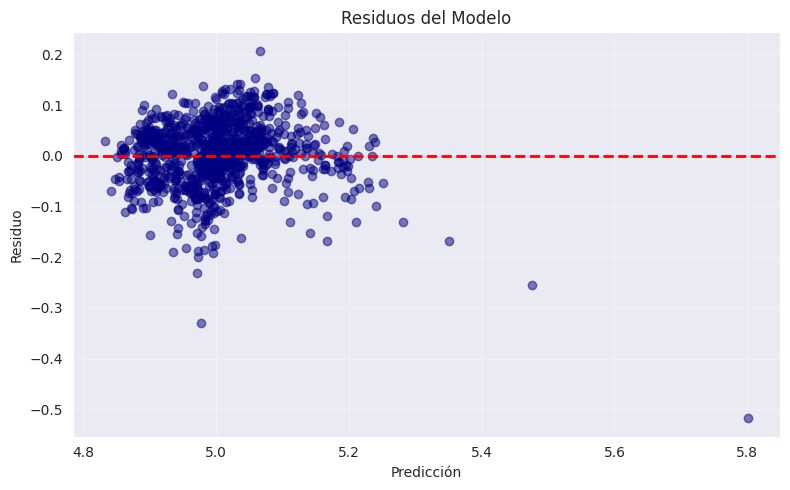

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# ‚úî Entrenar modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# ‚úî Predicciones
y_pred = modelo.predict(x_test)

# ‚úî M√©tricas de evaluaci√≥n
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"üîç Evaluaci√≥n del Modelo (Box-Cox)")
print(f"Coeficiente R¬≤      : {r2:.4f}")
print(f"Error Absoluto Medio: {mae:.2f}")
print(f"Error Cuadr√°tico Medio: {mse:.2f}")

# ‚úî Visualizaci√≥n de residuos
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test - y_pred, color='navy', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuos del Modelo')
plt.xlabel('Predicci√≥n')
plt.ylabel('Residuo')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
from scipy.special import inv_boxcox

# Crear m√°scara para valores v√°lidos
mascara_valida = (lambda_valor * y_pred + 1) > 0

# Filtrar predicciones y observaciones v√°lidas
y_pred_seguro = y_pred[mascara_valida]
y_test_seguro = y_test[mascara_valida]

# Reversi√≥n solo en el subconjunto v√°lido
y_pred_original = inv_boxcox(y_pred_seguro, lambda_valor)
y_test_original = inv_boxcox(y_test_seguro, lambda_valor)

# Recalcular m√©tricas en escala original
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("üîÅ Evaluaci√≥n en escala original (casos v√°lidos)")
print(f"R¬≤  : {r2_score(y_test_original, y_pred_original):.4f}")
print(f"MAE : {mean_absolute_error(y_test_original, y_pred_original):,.0f}")
print(f"MSE : {mean_squared_error(y_test_original, y_pred_original):,.0f}")

üîÅ Evaluaci√≥n en escala original (casos v√°lidos)
R¬≤  : -99.5337
MAE : 194,191
MSE : 7,590,940,228,403


In [32]:
# Paso 1 Vamos a construir una comparaci√≥n clara entre tu modelo lineal (en escala Box-Cox) y una alternativa m√°s
# flexible como Random Forest Regressor, entrenada directamente en la escala original (Valor) para ver qui√©n hace mejor el trabajo.
from sklearn.model_selection import train_test_split

# Variables explicativas en escala logar√≠tmica
X_rf = datos[['log_Dist_Playa', 'log_Dist_Farmacia']]
y_rf = datos['Valor']  # en escala original

# Divisi√≥n de datos
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=2811)

In [33]:
# Paso 2: entrenar Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Modelo RF
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=2811)
modelo_rf.fit(x_train_rf, y_train_rf)

# Predicci√≥n
y_pred_rf = modelo_rf.predict(x_test_rf)

# M√©tricas
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

print("üå≤ Evaluaci√≥n del modelo Random Forest")
print(f"R¬≤  : {r2_rf:.4f}")
print(f"MAE : {mae_rf:,.0f}")
print(f"MSE : {mse_rf:,.0f}")


üå≤ Evaluaci√≥n del modelo Random Forest
R¬≤  : 0.1834
MAE : 152,455
MSE : 66,808,518,086


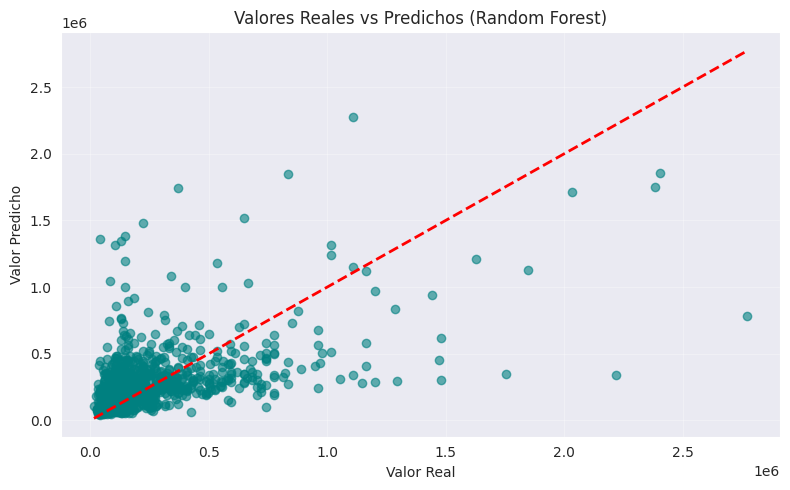

In [34]:
# Paso 3 (opcional): comparaci√≥n visual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test_rf, y_pred_rf, color='teal', alpha=0.6)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Valores Reales vs Predichos (Random Forest)')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estad√≠sticas de prueba del modelo

### Test de significancia conjunta de los par√°metros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los par√°metros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Estimando el modelo con el statsmodels

## Evaluando las estad√≠sticas de prueba para el nuevo modelo

### Test de significancia conjunta de los par√°metros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los par√°metros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el m√©todo *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinaci√≥n (R¬≤) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinaci√≥n - R¬≤

El coeficiente de determinaci√≥n (R¬≤) es una medida de resumen que indica cu√°nto se ajusta la recta de regresi√≥n a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando predicciones para los datos de PRUEBA (X_test) con el m√©todo *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinaci√≥n (R¬≤) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando predicci√≥n puntual

## Invirtiendo la transformaci√≥n para obtener la estimaci√≥n en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretaci√≥n de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la funci√≥n exponencial para que sea presentado en US$.</p>

## Obteniendo los coeficientes de regresi√≥n

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresi√≥n </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresi√≥n parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relaci√≥n a $X_2$ y $X_3$, es decir, la variaci√≥n porcentual de Y correspondiente a una variaci√≥n porcentual dada (peque√±a ) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista de nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretaci√≥n de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> ‚Üí  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>√Årea (m¬≤)</b> ‚Üí Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adici√≥n de 1% en el √Årea de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> ‚Üí Manteniendo constante el valor de $X_2$ (√Årea), la adici√≥n de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminuci√≥n de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 An√°lisis Gr√°fico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gr√°fico de dispersi√≥n entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [35]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicci√≥n X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicci√≥n', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

AttributeError: 'PairGrid' object has no attribute 'set_title'

## Obteniendo los residuos

## Graficando la distribuici√≥n de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuici√≥n de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax